# Building Decision Trees using Classification

**Heart Disease Prediction**

## Step 1: Importing the Modules

In [ ]:
# Importing required basic packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing required packages for visualization

from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [ ]:
# Importing required packages for decision tree evaluation

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV

## Step 2: Reading and Understanding the Data

In [ ]:
heart = pd.read_csv('heart_v2.csv')
heart.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [ ]:
heart.describe()

,age,sex,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,131.344444,249.659259,0.444444
std,9.109067,0.468195,17.861608,51.686237,0.497827
min,29.000000,0.000000,94.000000,126.000000,0.000000
25%,48.000000,0.000000,120.000000,213.000000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000


In [ ]:
heart.isnull().sum()

,0
age,0
sex,0
BP,0
cholestrol,0
heart disease,0


In [ ]:
heart.columns

Index(['age', 'sex', 'BP', 'cholestrol', 'heart disease'], dtype='object')

## Step 3: Splitting the data

In [ ]:
heart_train,heart_test = train_test_split(heart,train_size = 0.7, random_state = 42)

In [ ]:
heart_train.head()

,age,sex,BP,cholestrol,heart disease
84,57,1,110,201,0
251,44,1,130,219,0
92,54,1,124,266,1
201,58,1,125,300,1
126,62,1,120,267,1


In [ ]:
heart_test.head()

,age,sex,BP,cholestrol,heart disease
30,57,1,128,229,1
116,46,1,120,249,1
79,56,1,120,236,0
127,52,0,136,196,0
196,58,0,100,248,0


In [ ]:
X_train = heart_train.drop('heart disease',axis = 1)
y_train = heart_train['heart disease']

In [ ]:
X_train = pd.DataFrame(X_train)
X_train.head()

,age,sex,BP,cholestrol
84,57,1,110,201
251,44,1,130,219
92,54,1,124,266
201,58,1,125,300
126,62,1,120,267


In [ ]:
y_train = pd.DataFrame(y_train)
y_train.head()

,heart disease
84,0
251,0
92,1
201,1
126,1


In [ ]:
X_train.shape,y_train.shape

((189, 4), (189, 1))

In [ ]:
X_test = heart_test.drop('heart disease',axis = 1)
y_test = heart_test['heart disease']

In [ ]:
X_test = pd.DataFrame(X_test)
X_test.head()

,age,sex,BP,cholestrol
30,57,1,128,229
116,46,1,120,249
79,56,1,120,236
127,52,0,136,196
196,58,0,100,248


In [ ]:
y_test = pd.DataFrame(y_test)
y_test.head()

,heart disease
30,1
116,1
79,0
127,0
196,0


In [ ]:
X_test.shape,y_test.shape

((81, 4), (81, 1))

## Step 4: Model Creation

In [ ]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

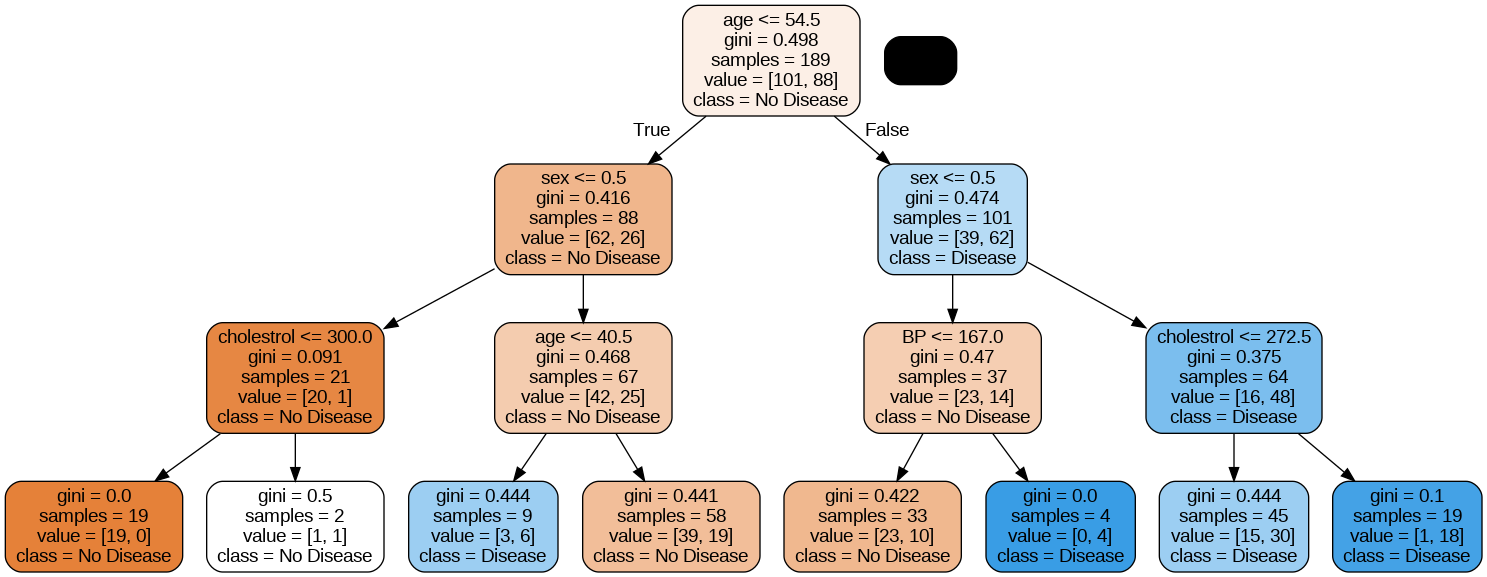

In [ ]:
# plotting tree with max_depth=3
dot_data = StringIO()

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns,
                class_names=['No Disease', "Disease"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#Image(graph.create_png(),width=800,height=900)
#graph.write_pdf("dt_heartdisease.pdf")

In [ ]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

**Model Evaluation**

In [ ]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.7407407407407407


array([[82, 19],
       [30, 58]])

In [ ]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.6049382716049383


array([[35, 14],
       [18, 14]])

**Since there is some difference between the accuracy scores of train set and test set,we will try to build the decision tree using some hyper parameters. and try to make the model a successful one**

## Step -5: Hyperparameters Tuning

In this cell, we will try building the decision tree with different hyper parameters.

In [ ]:
#Function to draw the decision tree

def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X_train.columns,
                    class_names=['Disease', "No Disease"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [ ]:
#Function to get the evaluation metrics

def evaluate_model(dt_classifier):
    y_train_pred = dt_classifier.predict(X_train)
    y_test_pred = dt_classifier.predict(X_test)
    print("Train Accuracy :", accuracy_score(y_train, y_train_pred))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, y_train_pred))

    print("-"*50)

    print("Test Accuracy :", accuracy_score(y_test, y_test_pred))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, y_test_pred))

 ### Model-1: Default parameter i.e., random_state

In [ ]:
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

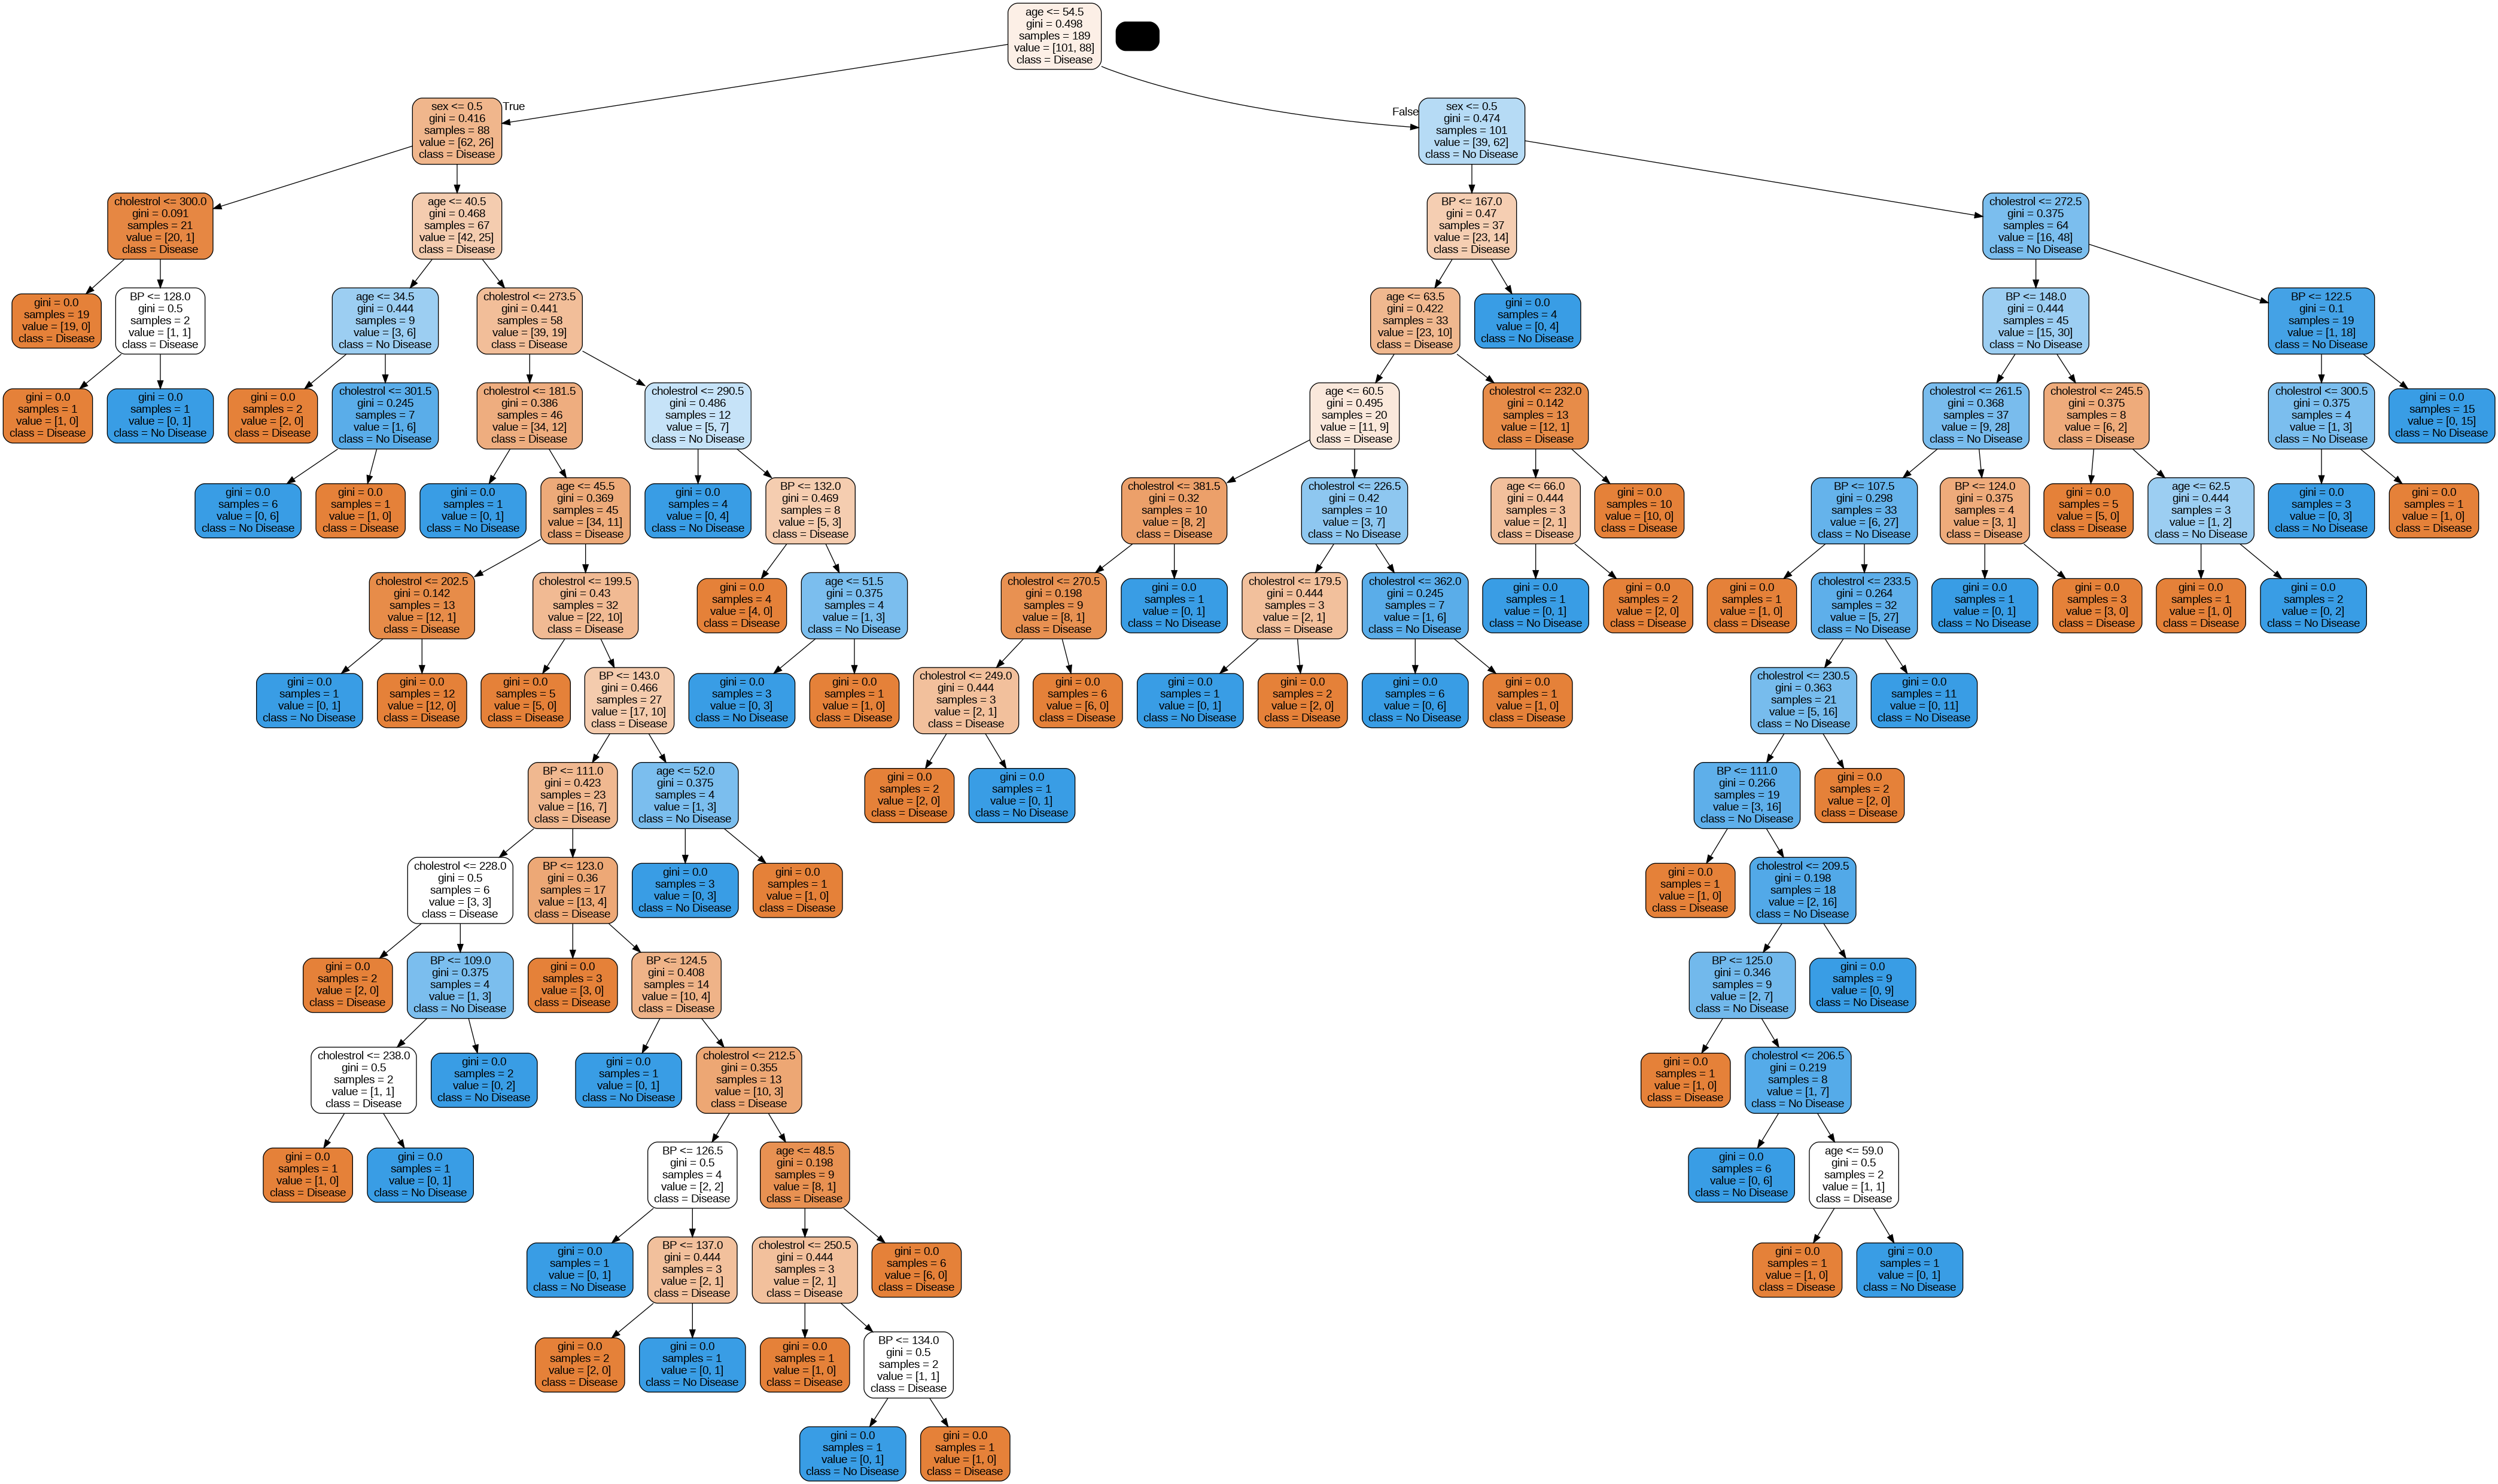

In [ ]:
graph = get_dt_graph(dt_default)
Image(graph.create_png())

In [ ]:
evaluate_model(dt_default)

Train Accuracy : 1.0
Train Confusion Matrix:
[[101   0]
 [  0  88]]
--------------------------------------------------
Test Accuracy : 0.6296296296296297
Test Confusion Matrix:
[[31 18]
 [12 20]]


### Model-2: With max_depth parameter

In [ ]:
dt_depth = DecisionTreeClassifier(random_state=42, max_depth=3)
dt_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

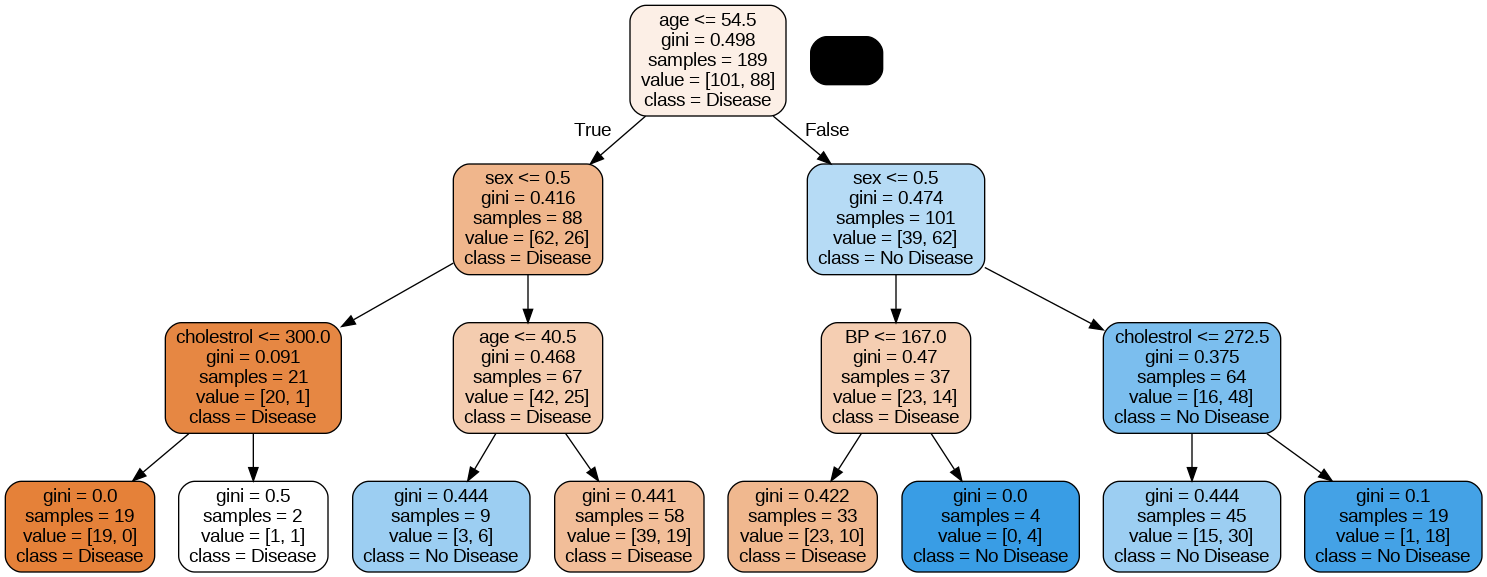

In [ ]:
gph = get_dt_graph(dt_depth)
Image(gph.create_png())

In [ ]:
evaluate_model(dt_depth)

Train Accuracy : 0.7407407407407407
Train Confusion Matrix:
[[82 19]
 [30 58]]
--------------------------------------------------
Test Accuracy : 0.6049382716049383
Test Confusion Matrix:
[[35 14]
 [18 14]]


### Model-3: With min_samples_split parameter

In [ ]:
dt_min_split = DecisionTreeClassifier(random_state=42, min_samples_split=20)
dt_min_split.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=20, random_state=42)

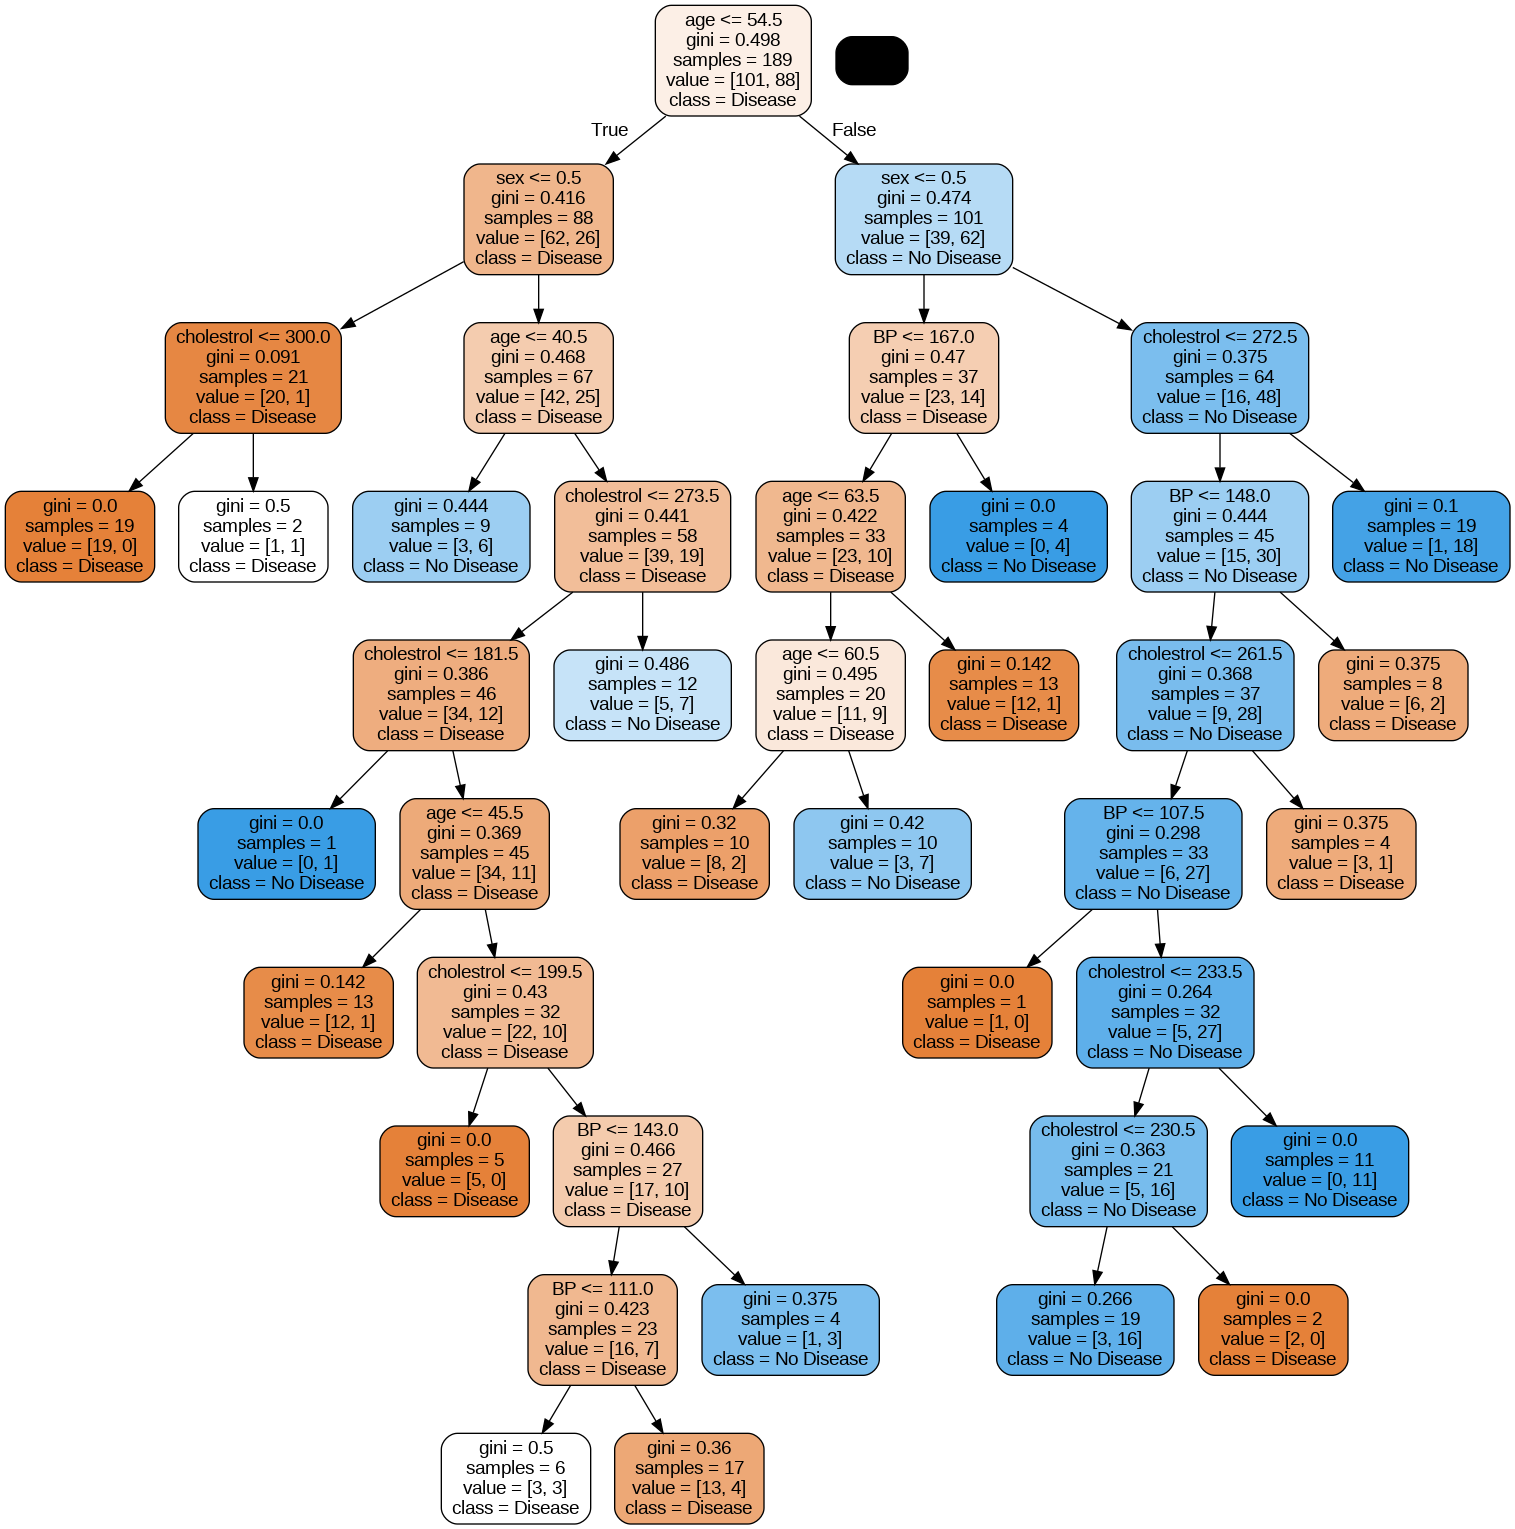

In [ ]:
gph = get_dt_graph(dt_min_split)
Image(gph.create_png())

In [ ]:
evaluate_model(dt_min_split)

Train Accuracy : 0.8359788359788359
Train Confusion Matrix:
[[85 16]
 [15 73]]
--------------------------------------------------
Test Accuracy : 0.6419753086419753
Test Confusion Matrix:
[[32 17]
 [12 20]]


### Model-4: With min_samples_leaf parameter

In [ ]:
dt_min_leaf = DecisionTreeClassifier(random_state=42, min_samples_leaf=20)
dt_min_leaf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

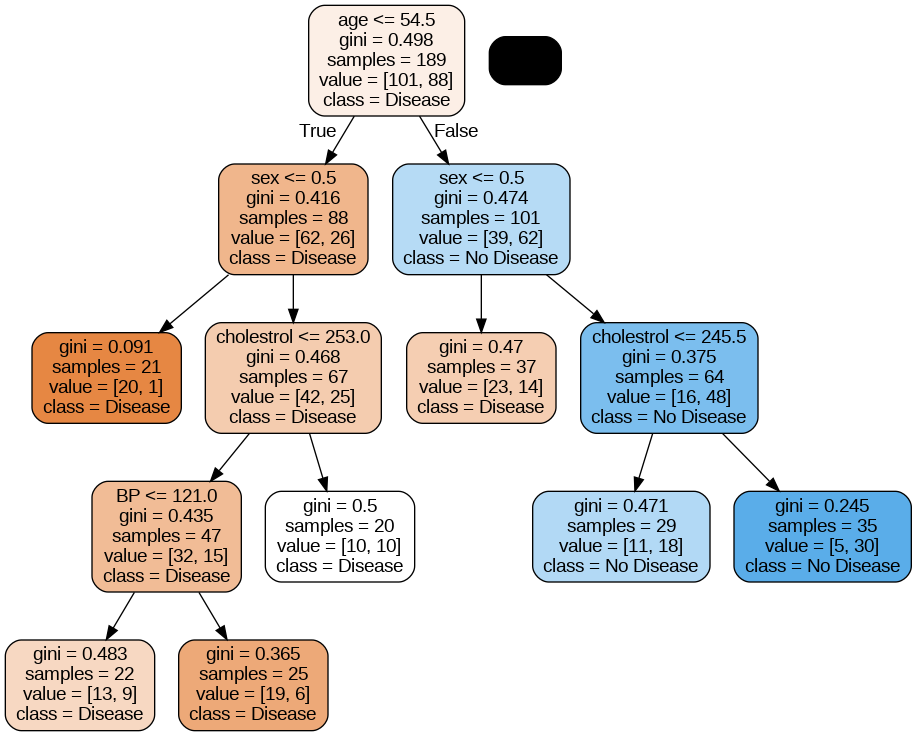

In [ ]:
gph = get_dt_graph(dt_min_leaf)
Image(gph.create_png())

In [ ]:
evaluate_model(dt_min_leaf)

Train Accuracy : 0.7037037037037037
Train Confusion Matrix:
[[85 16]
 [40 48]]
--------------------------------------------------
Test Accuracy : 0.6419753086419753
Test Confusion Matrix:
[[38 11]
 [18 14]]


### Model-5: Using Entropy instead of Gini in criterion parameter

In [ ]:
dt_min_leaf_entropy = DecisionTreeClassifier(min_samples_leaf=20, random_state=42, criterion="entropy")
dt_min_leaf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       random_state=42)

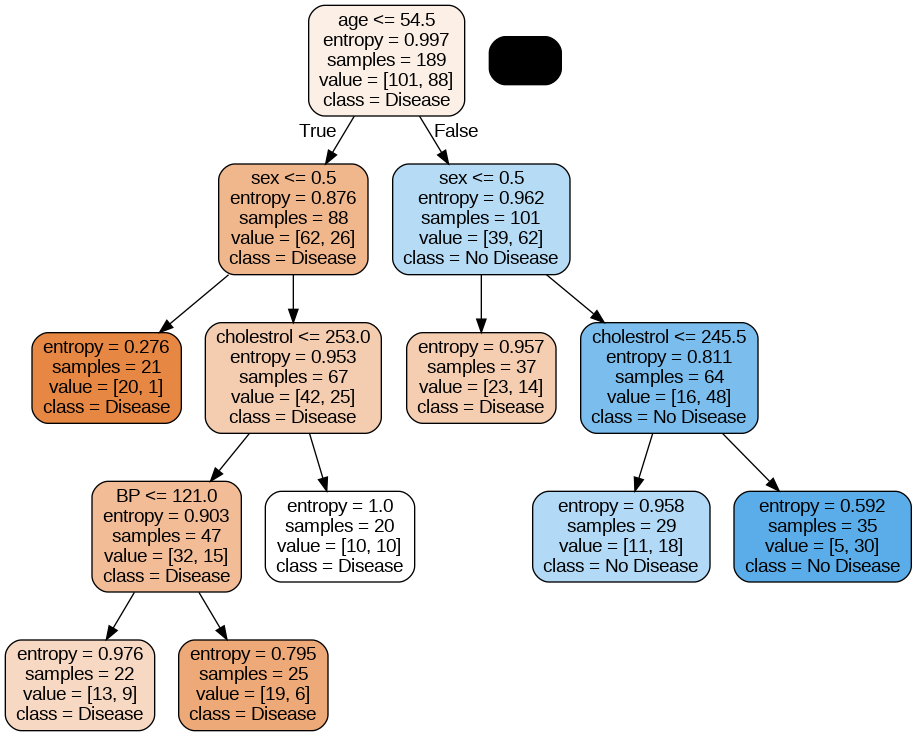

In [ ]:
gph = get_dt_graph(dt_min_leaf_entropy)
Image(gph.create_png())

In [ ]:
evaluate_model(dt_min_leaf_entropy)

Train Accuracy : 0.7037037037037037
Train Confusion Matrix:
[[85 16]
 [40 48]]
--------------------------------------------------
Test Accuracy : 0.6419753086419753
Test Confusion Matrix:
[[38 11]
 [18 14]]


## Step 6: Using GridSearchCV

In [ ]:
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
# Create the parameter grid based on the results of Grid search
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

The no of models that are created by above param_grid are 5 * 5 * 2 = 50

In [ ]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

Total 50 models with cv = 4, so total there are 50 * 4 = 200

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [ ]:
#the model that is created with these parameters are the best
print('The best parameters: ',grid_search.best_params_)

The best parameters:  {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 5}


In [ ]:
#the model that is created with these parameters have the accuracy score
print('The best score:',grid_search.best_score_)

The best score: 0.6669991134751774


In [ ]:
print('The best estimator:',grid_search.best_estimator_)

The best estimator: DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=42)


In [ ]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df
#total 50 models are created

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005879,0.000689,0.006087,0.000306,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708333,0.744681,0.617021,0.531915,0.650488,0.082762,17
1,0.005315,0.000221,0.006819,0.001431,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708333,0.744681,0.617021,0.531915,0.650488,0.082762,17
2,0.006195,0.001086,0.007612,0.001187,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.687500,0.744681,0.617021,0.531915,0.645279,0.079551,20
3,0.007942,0.003852,0.009320,0.004545,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3
4,0.006142,0.000777,0.007752,0.000810,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.541667,0.531915,0.531915,0.531915,0.534353,0.004223,41
5,0.006768,0.001267,0.007225,0.000867,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.625000,0.744681,0.595745,0.659574,0.656250,0.055831,2
6,0.007148,0.001491,0.007121,0.000599,gini,3,10,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.645833,0.680851,0.595745,0.680851,0.650820,0.034864,13
7,0.005408,0.000383,0.006503,0.000160,gini,3,20,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.687500,0.744681,0.617021,0.531915,0.645279,0.079551,20
8,0.007791,0.002409,0.006711,0.000201,gini,3,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3
9,0.005355,0.000320,0.006437,0.000154,gini,3,100,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.541667,0.531915,0.531915,0.531915,0.534353,0.004223,41


In [ ]:
dt_best = grid_search.best_estimator_

In [ ]:
evaluate_model(dt_best)

Train Accuracy : 0.7195767195767195
Train Confusion Matrix:
[[82 19]
 [34 54]]
--------------------------------------------------
Test Accuracy : 0.6172839506172839
Test Confusion Matrix:
[[36 13]
 [18 14]]


In [ ]:
print(classification_report(y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70        49
           1       0.52      0.44      0.47        32

    accuracy                           0.62        81
   macro avg       0.59      0.59      0.59        81
weighted avg       0.61      0.62      0.61        81



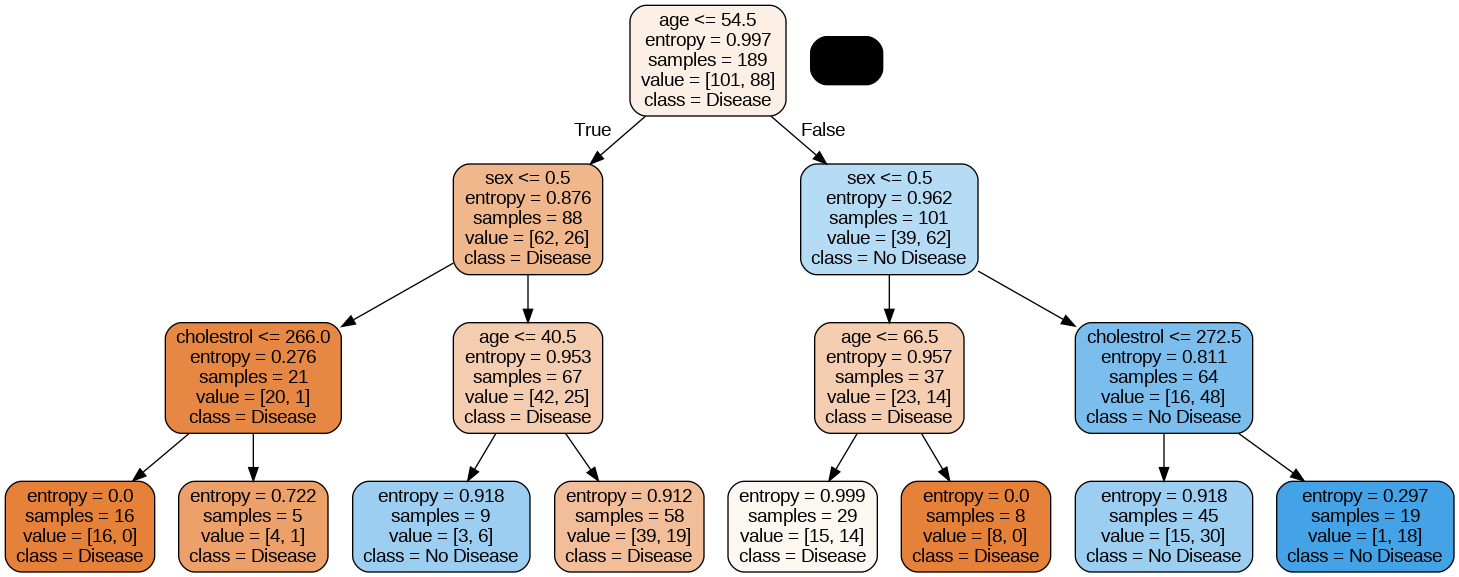

In [ ]:
gph = get_dt_graph(dt_best)
Image(gph.create_png())

## Step 7: Using RandomizedSearchCV

In [ ]:
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
# Create the parameter grid based on the results of Grid search
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

The no of models that are created by above param_grid are only 10 because of the parameter n_iter as (n_iter = 10)

In [ ]:
# Instantiate the grid random search model
grid_random = RandomizedSearchCV(estimator=dt,
                           param_distributions=params,n_iter=10,
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
grid_random.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 5, 10, 20],
                                        'min_samples_leaf': [5, 10, 20, 50,
                                                             100]},
                   scoring='accuracy', verbose=1)

In [ ]:
#the model that is created with these parameters are the best
print('The best parameters: ',grid_random.best_params_)

The best parameters:  {'min_samples_leaf': 50, 'max_depth': 2, 'criterion': 'gini'}


In [ ]:
#the model that is created with these parameters have the accuracy score
print('The best score:',grid_random.best_score_)

The best score: 0.6560283687943262


In [ ]:
print('The best estimator:',grid_random.best_estimator_)

The best estimator: DecisionTreeClassifier(max_depth=2, min_samples_leaf=50, random_state=42)


In [ ]:
score_df = pd.DataFrame(grid_random.cv_results_)
score_df
#total 50 models are created

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013145,0.002226,0.016873,0.007561,100,3,gini,"{'min_samples_leaf': 100, 'max_depth': 3, 'cri...",0.541667,0.531915,0.531915,0.531915,0.534353,0.004223,8
1,0.007990,0.003912,0.007404,0.002139,50,2,gini,"{'min_samples_leaf': 50, 'max_depth': 2, 'crit...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,1
2,0.008372,0.003109,0.009136,0.005097,100,20,gini,"{'min_samples_leaf': 100, 'max_depth': 20, 'cr...",0.541667,0.531915,0.531915,0.531915,0.534353,0.004223,8
3,0.014529,0.003587,0.012593,0.002829,5,10,gini,"{'min_samples_leaf': 5, 'max_depth': 10, 'crit...",0.562500,0.702128,0.595745,0.553191,0.603391,0.059160,7
4,0.008173,0.003655,0.006229,0.000147,100,3,entropy,"{'min_samples_leaf': 100, 'max_depth': 3, 'cri...",0.541667,0.531915,0.531915,0.531915,0.534353,0.004223,8
5,0.005383,0.000868,0.007657,0.001787,5,2,entropy,"{'min_samples_leaf': 5, 'max_depth': 2, 'crite...",0.583333,0.744681,0.617021,0.531915,0.619238,0.078510,6
6,0.012632,0.004788,0.011795,0.003231,10,2,gini,"{'min_samples_leaf': 10, 'max_depth': 2, 'crit...",0.708333,0.744681,0.617021,0.531915,0.650488,0.082762,2
7,0.013260,0.003925,0.015203,0.003314,20,2,gini,"{'min_samples_leaf': 20, 'max_depth': 2, 'crit...",0.687500,0.744681,0.617021,0.531915,0.645279,0.079551,3
8,0.016132,0.001227,0.013704,0.002593,5,10,entropy,"{'min_samples_leaf': 5, 'max_depth': 10, 'crit...",0.583333,0.702128,0.638298,0.574468,0.624557,0.051025,5
9,0.006797,0.003085,0.013891,0.003904,10,20,entropy,"{'min_samples_leaf': 10, 'max_depth': 20, 'cri...",0.541667,0.702128,0.595745,0.659574,0.624778,0.061123,4


In [ ]:
dt_best = grid_random.best_estimator_

In [ ]:
evaluate_model(dt_best)

Train Accuracy : 0.656084656084656
Train Confusion Matrix:
[[62 39]
 [26 62]]
--------------------------------------------------
Test Accuracy : 0.5925925925925926
Test Confusion Matrix:
[[30 19]
 [14 18]]


In [ ]:
print(classification_report(y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.68      0.61      0.65        49
           1       0.49      0.56      0.52        32

    accuracy                           0.59        81
   macro avg       0.58      0.59      0.58        81
weighted avg       0.60      0.59      0.60        81



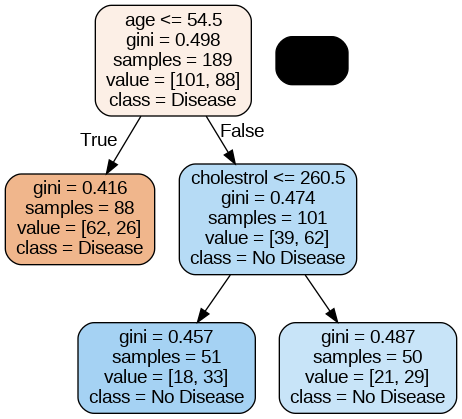

In [ ]:
gph = get_dt_graph(dt_best)
Image(gph.create_png())

## Step 8: Using RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_train.head()

,age,sex,BP,cholestrol
84,57,1,110,201
251,44,1,130,219
92,54,1,124,266
201,58,1,125,300
126,62,1,120,267


from matplotlib import pyplot as plt
_df_0['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['BP'].plot(kind='hist', bins=20, title='BP')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['cholestrol'].plot(kind='hist', bins=20, title='cholestrol')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='age', y='BP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='BP', y='cholestrol', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['sex']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('sex', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('sex')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['sex']
  ys = series['BP']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('sex', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('sex')
_ = plt.ylabel('BP')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['sex']
  ys = series['cholestrol']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('sex', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('sex')
_ = plt.ylabel('cholestrol')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['sex']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'sex'}, axis=1)
              .sort_values('sex', ascending=True))
  xs = counted['sex']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('sex', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('sex')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['BP'].plot(kind='line', figsize=(8, 4), title='BP')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['cholestrol'].plot(kind='line', figsize=(8, 4), title='cholestrol')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
y_train.head()

,heart disease
84,0
251,0
92,1
201,1
126,1


In [ ]:
rfc = RandomForestClassifier(random_state=42, max_depth =3, n_estimators=10)

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=42)

In [ ]:
rfc.estimators_

[DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1608637542),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1273642419),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1935803228),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=787846414),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=996406378),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1201263687),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=423734972),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=415968276),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=670094950),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1914837113)]

In [ ]:
sample_tree_5 = rfc.estimators_[4]
sample_tree_5

DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=996406378)

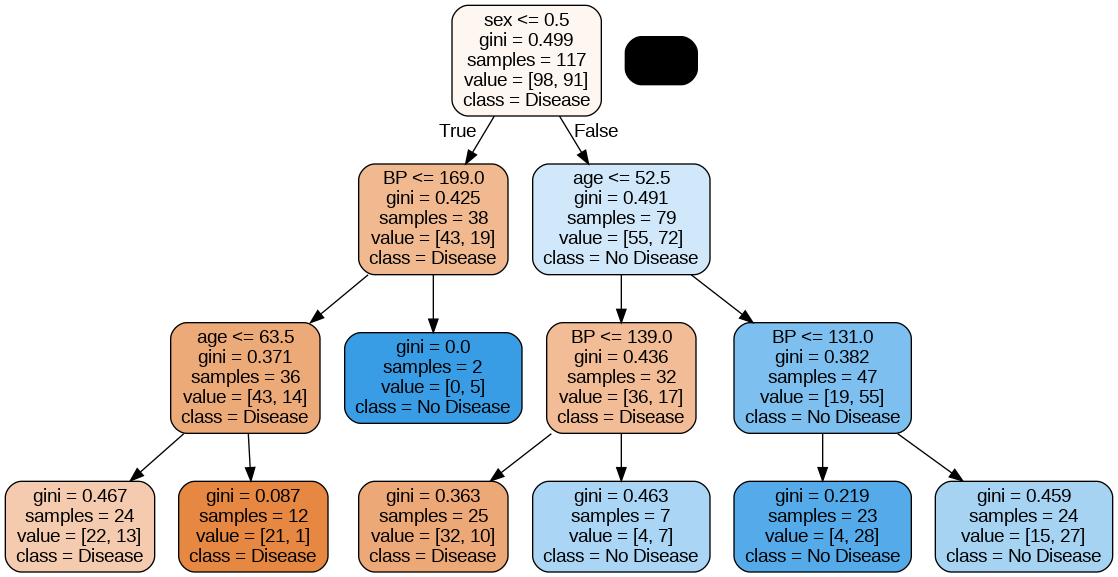

In [ ]:
gph = get_dt_graph(sample_tree_5)
Image(gph.create_png())

In [ ]:
rfc.feature_importances_

array([0.44655031, 0.17631561, 0.1691391 , 0.20799498])

In [ ]:
imp_data = pd.DataFrame({'Column name': X_train.columns, 'Importance': rfc.feature_importances_ })
imp_data.sort_values(by='Importance', ascending=False)

,Column name,Importance
0,age,0.446550
3,cholestrol,0.207995
1,sex,0.176316
2,BP,0.169139


In [ ]:
rfc = RandomForestClassifier(random_state=42, max_depth =3, n_estimators=10, oob_score=True)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, oob_score=True,
                       random_state=42)

In [ ]:
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

In [ ]:
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

0.7407407407407407
0.6172839506172839


In [ ]:
rfc.oob_score_

0.6349206349206349

### Using GridSearchCV

In [ ]:
grid_rfc = RandomForestClassifier(random_state=42, n_jobs=-1)

In [ ]:
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'n_estimators': [10, 30, 50, 100, 200],
    'max_features': [2, 3, 4]
}

In [ ]:
grid_search = GridSearchCV(estimator=grid_rfc,
                           param_grid=params,
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 375 candidates, totalling 1500 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
#the model that is created with these parameters are the best
print('The best parameters: ',grid_search.best_params_)

The best parameters:  {'max_depth': 1, 'max_features': 3, 'min_samples_leaf': 5, 'n_estimators': 30}


In [ ]:
#the model that is created with these parameters have the accuracy score
print('The best score:',grid_search.best_score_)

The best score: 0.7037898936170213


In [ ]:
print('The best estimator:',grid_search.best_estimator_)

The best estimator: RandomForestClassifier(max_depth=1, max_features=3, min_samples_leaf=5,
                       n_estimators=30, n_jobs=-1, random_state=42)


In [ ]:
rfc_best = grid_search.best_estimator_
rfc_best

RandomForestClassifier(max_depth=1, max_features=3, min_samples_leaf=5,
                       n_estimators=30, n_jobs=-1, random_state=42)

In [ ]:
evaluate_model(rfc_best)

Train Accuracy : 0.6931216931216931
Train Confusion Matrix:
[[77 24]
 [34 54]]
--------------------------------------------------
Test Accuracy : 0.654320987654321
Test Confusion Matrix:
[[35 14]
 [14 18]]


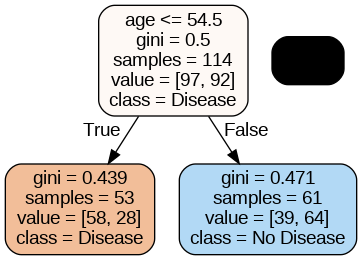

In [ ]:
best_tree = rfc_best.estimators_[5]
gph = get_dt_graph(best_tree)
Image(gph.create_png())

In [ ]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df
#total 375 models are created

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.074080,0.022805,0.036965,0.003765,1,2,5,10,"{'max_depth': 1, 'max_features': 2, 'min_sampl...",0.666667,0.744681,0.531915,0.808511,0.687943,0.103142,20
1,0.155063,0.022184,0.053059,0.009679,1,2,5,30,"{'max_depth': 1, 'max_features': 2, 'min_sampl...",0.666667,0.659574,0.510638,0.787234,0.656028,0.098080,150
2,0.262775,0.032207,0.046179,0.013233,1,2,5,50,"{'max_depth': 1, 'max_features': 2, 'min_sampl...",0.687500,0.744681,0.595745,0.765957,0.698471,0.065884,9
3,0.551978,0.037855,0.067203,0.016845,1,2,5,100,"{'max_depth': 1, 'max_features': 2, 'min_sampl...",0.687500,0.744681,0.574468,0.723404,0.682513,0.065642,38
4,0.940728,0.265243,0.088420,0.027031,1,2,5,200,"{'max_depth': 1, 'max_features': 2, 'min_sampl...",0.687500,0.723404,0.595745,0.744681,0.687832,0.056959,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,0.079725,0.016226,0.044322,0.003539,20,4,100,10,"{'max_depth': 20, 'max_features': 4, 'min_samp...",0.541667,0.531915,0.531915,0.531915,0.534353,0.004223,226
371,0.158694,0.022001,0.046506,0.019903,20,4,100,30,"{'max_depth': 20, 'max_features': 4, 'min_samp...",0.541667,0.531915,0.531915,0.531915,0.534353,0.004223,226
372,0.285636,0.010325,0.051442,0.008630,20,4,100,50,"{'max_depth': 20, 'max_features': 4, 'min_samp...",0.541667,0.531915,0.531915,0.531915,0.534353,0.004223,226
373,0.437357,0.096607,0.060006,0.012735,20,4,100,100,"{'max_depth': 20, 'max_features': 4, 'min_samp...",0.541667,0.531915,0.531915,0.531915,0.534353,0.004223,226
